In [2]:
import sympy.physics.quantum.constants as cst
import sympy.physics.units as u
from sympy import *
from sympy.physics.units.systems import *
from sympy.plotting import plot,plot3d,PlotGrid

In [3]:
rho, l_fil, s_Cu, l = symbols("rho l_fil s_Cu l")
D, d, N = symbols("D d N")
l_fil = pi * D * N
s_Cu = pi * (d / 2) ** 2

N est aussi déterminable avec la longeur de la bobine l et le diamètre totale du fil dw

In [4]:
d_w=symbols('d_w')
N_det=l/d_w # // n'est pas supporté par le plot3d
l_det=N*d_w

In [5]:
R = rho * l_fil / s_Cu
R

4*D*N*rho/d**2

In [6]:
202*(0.25e-3**2)/(4*1.68e-8*0.38)

494.4000626566416

In [7]:
6*22e-3/0.3e-3

440.00000000000006

## 

In [8]:
x.evalf(subs={x:(500*pi*(0.5e-3 /2)**2)/ 1.68e-8})

NameError: name 'x' is not defined

In [9]:
5843/(0.4*3.14)

4652.0700636942665

In [10]:
convert_to(
    R.subs([(rho, 1.68e-8 * u.m * u.ohm), (d, 80 * u.um), (D, 20 * u.cm), (N, 100)]),
    ohm,
)

NameError: name 'convert_to' is not defined

In [11]:
R.subs([(rho, 1.68e-8), (d, 0.125e-3), (D, 13e-3), (N, 1500)])

83.8656000000000

In [12]:
R

4*D*N*rho/d**2

In [13]:
R.evalf(subs={"rho": 1.68e-8, "d": 0.08e-3, "D": 0.2, "N": 100})

210.000000000000

In [14]:
t=symbols('t')
R2=4*rho*N*(D+(N*(d+t)**2)/l)/d**2
R2

4*N*rho*(D + N*(d + t)**2/l)/d**2

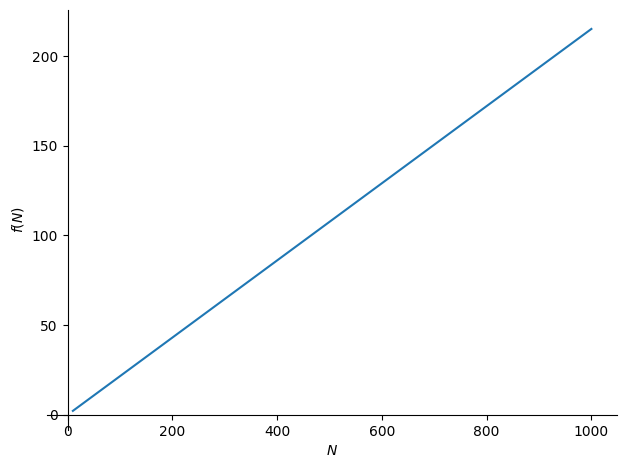

In [15]:
plot(R.subs({ rho: 1.68e-8 , d: 0.25e-3 , D: 0.20}),(N,10,1000), show=True)

In [16]:
L = (
    0.002
    * pi
    * D * 100
    * (N**2)
    * (
        log(1 + ((pi * D) / (2 * l)))
        + (
            2.3004
            + (3.437 * l / (D))
            + 1.7636 * ((l / (D)) ** 2)
            - 0.47 / ((0.755 + ((D) / l)) ** 1.44)
        )
        ** -1
    )
)/1e3
L

0.0002*pi*D*N**2*(log(pi*D/(2*l) + 1) + 1/(-0.47/(D/l + 0.755)**1.44 + 2.3004 + 3.437*l/D + 1.7636*l**2/D**2))

In [17]:
L.evalf(
    subs={
        l: 9.8e-3, 
        D: 0.14, 
        N: N_det.evalf(subs={l:9.8e-3, d_w:0.3e-3})
    }
)

0.333054828244755

In [18]:
L.evalf(
    subs={
        l: 22e-3, 
        D: 0.38, 
        N: 440 #nb de tours théorique pour la bobine V2
    }
)

172.750097280509

In [19]:
L.evalf(
    subs={
        l: 22e-3, 
        D: 0.38, 
        N: 494 #nb de tours expérimental par calcul depuis la Résistance pour la bobine V2
    }
)

217.754352995590

In [20]:
L.evalf(
    subs={
        l: 22e-3, 
        D: 0.38, 
        N: 448 #nb de tours expérimental pour la bobine V2
    }
)

179.089026469976

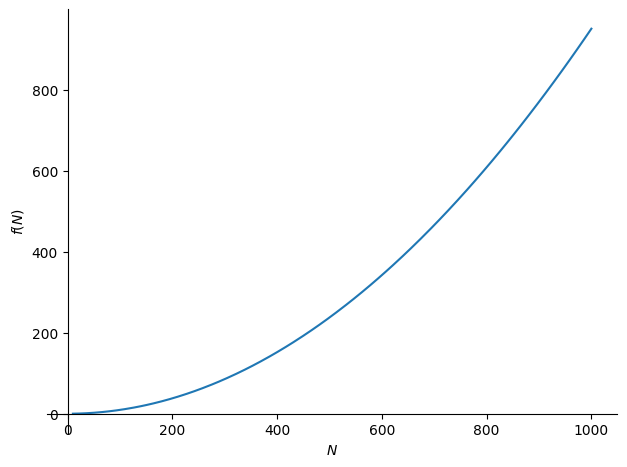

In [21]:
plot(L.subs({ l: 22e-3, D: 0.4}),(N,10,1000), show=True)

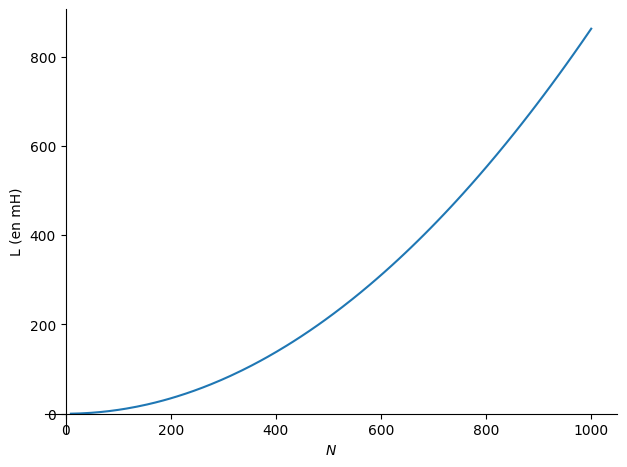

In [159]:
plot(L.subs({ l: 22e-3, D: 0.37}),(N,10,1000), show=True, ylabel='L (en mH)')

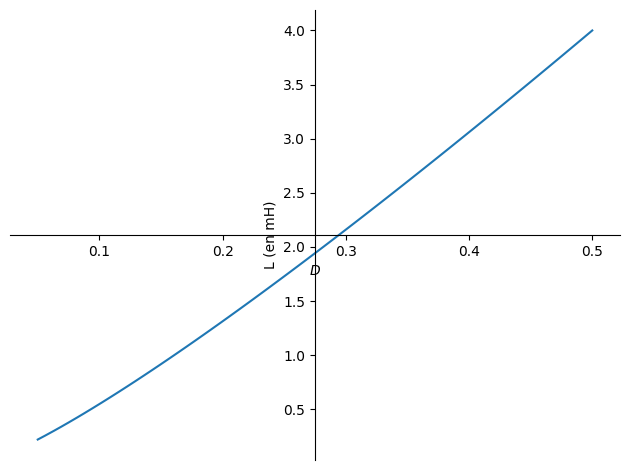

In [135]:
plot(L.subs({ l: 7.45e-3, N: 50}),(D,0.05,0.5), show=True, ylabel='L (en mH)')

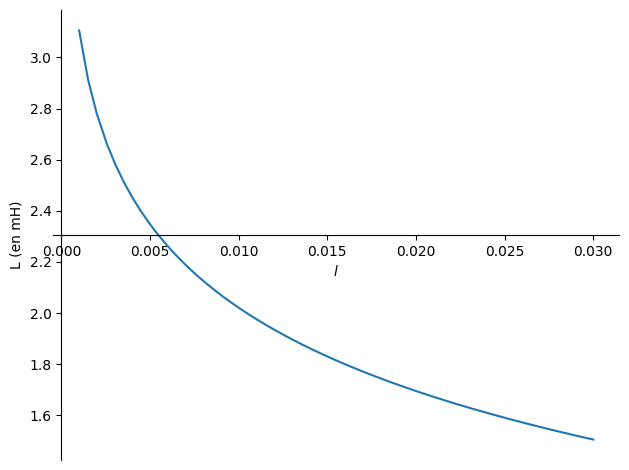

In [136]:
plot(L.subs({ D: 0.3, N: 50}),(l,1e-3,3e-2), show=True, ylabel='L (en mH)')

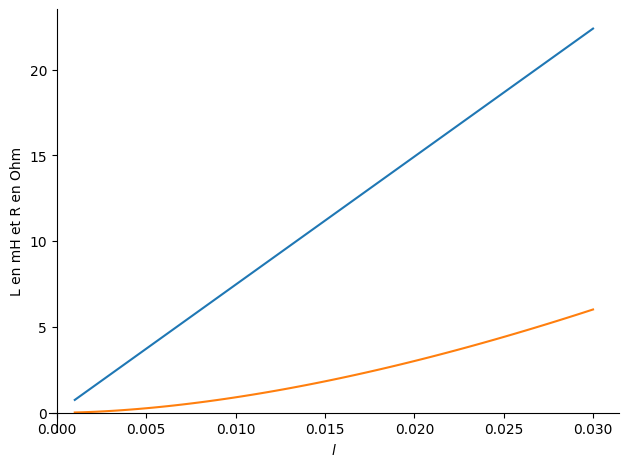

In [137]:
plot( R.subs({ rho: 1.68e-8 ,d:0.3e-3, N:N_det.subs([(d_w,0.3e-3)]),D:0.3 }),L.subs([ (N, N_det.subs([(d_w,0.3e-3)])), (D,0.3)]), (l,1e-3,3e-2), ylabel='L en mH et R en Ohm')

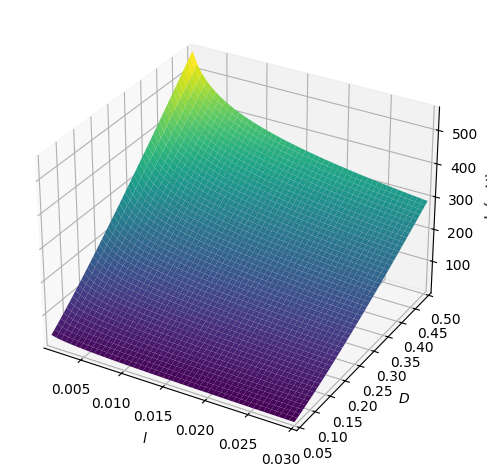

In [138]:
plot3d(L.subs([ (N, 500)]),(l,1e-3,3e-2), (D, 0.05,0.5), zlabel='L (mH)')

In [139]:
L.evalf(
    subs={
        l: 9.8e-3, 
        D: 0.14, 
        N: N_det.evalf(subs={l:9.8e-3, d_w:0.3e-3})
    }
)

0.333054828244755

In [140]:
N_det.evalf(subs={l:9.8e-3, d_w:0.3e-3})

32.6666666666667

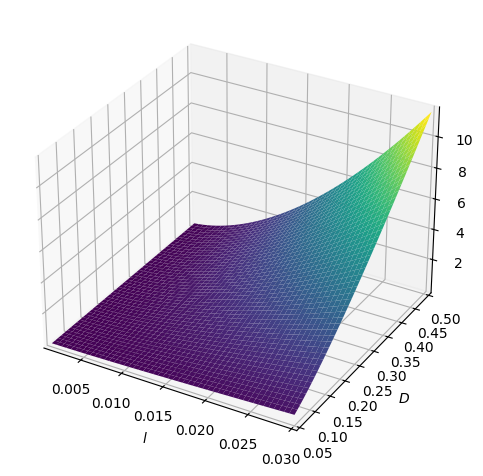

In [141]:
p1=plot3d(L.subs([ (N, N_det.subs([(d_w,0.3e-3)]))]),(l,1e-3,3e-2), (D, 0.05,0.5), zlabel='L (mH)')

In [142]:
L.subs([ (N, N_det.subs([(d_w,0.3e-3)]))])

2222.22222222222*pi*D*l**2*(log(pi*D/(2*l) + 1) + 1/(-0.47/(D/l + 0.755)**1.44 + 2.3004 + 3.437*l/D + 1.7636*l**2/D**2))

In [143]:
L

0.0002*pi*D*N**2*(log(pi*D/(2*l) + 1) + 1/(-0.47/(D/l + 0.755)**1.44 + 2.3004 + 3.437*l/D + 1.7636*l**2/D**2))

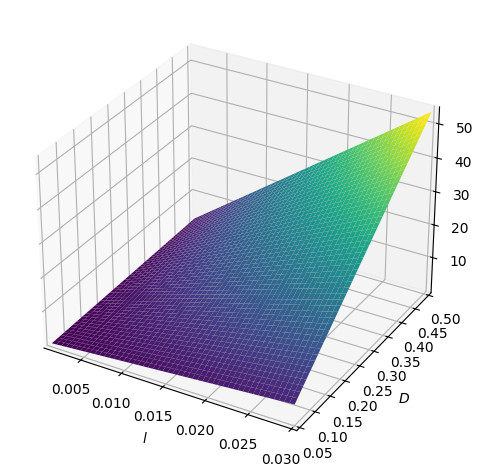

In [144]:
p2=plot3d(R.subs({ rho: 1.68e-8 ,d:0.25e-3, N:N_det.subs([(d_w,0.3e-3)]) }),(l,1e-3,3e-2),(D, 0.05,0.5), zlabel='R(ohm)')

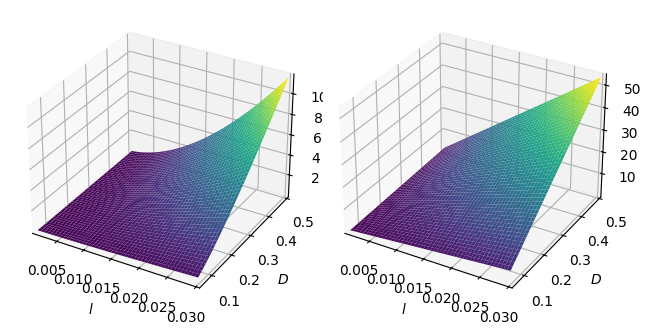

In [145]:
PlotGrid(1,2,p1,p2)

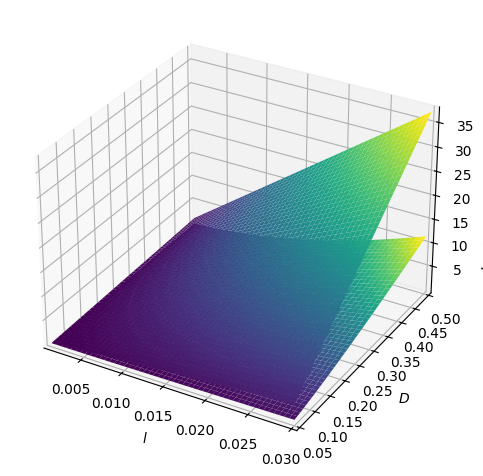

In [146]:
plot3d(R.subs({ rho: 1.68e-8 ,d:0.3e-3, N:N_det.subs([(d_w,0.3e-3)]) }),L.subs([ (N, N_det.subs([(d_w,0.3e-3)]))]),(l,1e-3,3e-2),(D, 0.05,0.5),zlabel='L en mH et R en Ohm')

In [26]:
Nsc,n,e_k,epsi_r = symbols('Nsc, n,e_k, epsi_r')
epsi=8.85e-12 * epsi_r
ee=(d_w-d)/2
C=1e12*((Nsc-1)*pi*epsi*d_w*n*(D+e_k*(n-1)+n*d_w)/((Nsc**2)*ee))
C

8.85*pi*d_w*epsi_r*n*(Nsc - 1)*(D + d_w*n + e_k*(n - 1))/(Nsc**2*(-d/2 + d_w/2))

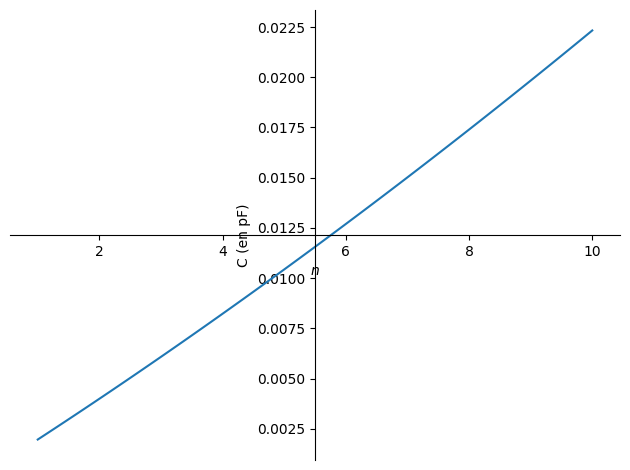

In [37]:
plot(C.subs({ D: 0.01, Nsc: 5000,d_w:0.125e-3,e_k:0.025e-3,d:0.100e-3,epsi_r:3.5}),(n,1,10), show=True, ylabel='C (en pF)')

In [148]:
C.evalf(subs={
    Nsc:843,
    d_w:9.5e-5,
    n:16,
    D:5e-3,
    e_k:4.5e-5,
    d:8e-5,
    epsi_r:3.5})

0.168124595640444

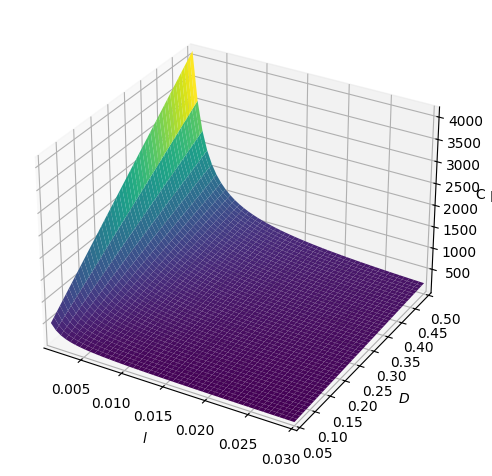

In [149]:
p3=plot3d(C.subs({Nsc:N_det.subs([(d_w,0.3e-3)]),d_w:0.3e-3,n:33,e_k:0.3e-3 - 0.25e-3,d:0.25e-3,epsi_r:3.5}),(l,1e-3,3e-2),(D, 0.05,0.5),zlabel='C pF')

In [27]:
Cc_discontinu=(pi*epsi*l*(n-1)*(D+n*d_w+(n-1)*e_k)/((n**2)*e_k))*1e12
Cc_discontinu

8.85*pi*epsi_r*l*(n - 1)*(D + d_w*n + e_k*(n - 1))/(e_k*n**2)

In [28]:
Cc_discontinu.evalf(subs={
    d_w:9.5e-5,
    n:16,
    D:5e-3,
    e_k:4.5e-5,
    l:7.9e-2,
    epsi_r:3.5})

72.0207860883702

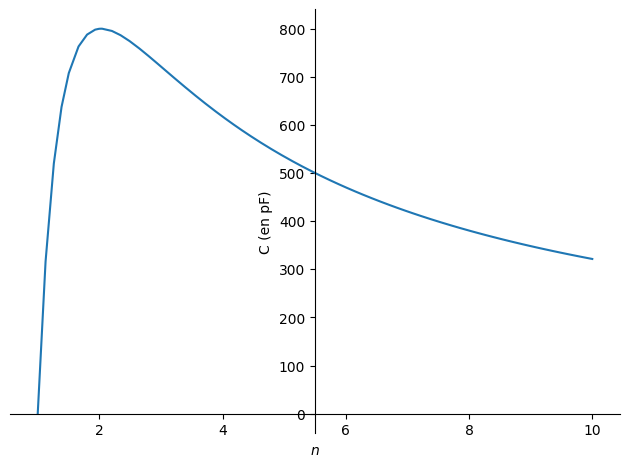

In [36]:
plot(Cc_discontinu.subs({ D: 0.01,d_w:0.125e-3,e_k:0.025e-3,l:0.08,epsi_r:3.5}),(n,1,10), show=True, ylabel='C (en pF)')

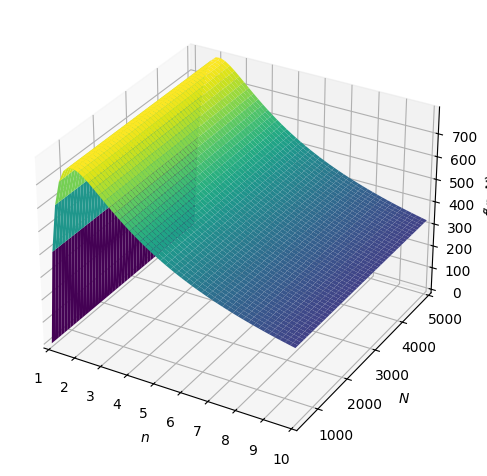

In [31]:
plot3d(Cc_discontinu.subs({ D: 0.01,d_w:0.125e-3,e_k:0.025e-3,l:0.08,epsi_r:3.5}),(n,1,10),(N,400,5000))

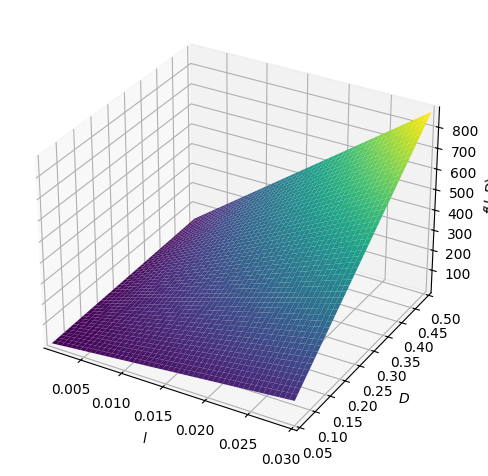

In [152]:
p4=plot3d(Cc_discontinu.subs({d_w:0.3e-3,n:33,e_k:0.3e-3 - 0.25e-3,epsi_r:3.5}),(l,1e-3,3e-2),(D, 0.05,0.5))

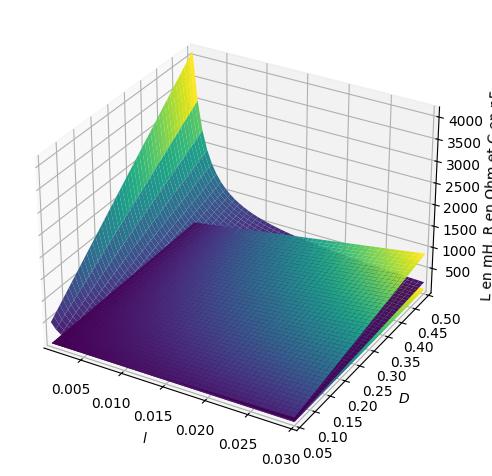

In [153]:
plot3d(R.subs({ rho: 1.68e-8 ,d:0.3e-3, N:N_det.subs([(d_w,0.3e-3)]) }),L.subs([ (N, N_det.subs([(d_w,0.3e-3)]))]),C.subs({Nsc:N_det.subs([(d_w,0.3e-3)]),d_w:0.3e-3,n:33,e_k:0.3e-3 - 0.25e-3,d:0.25e-3,epsi_r:3.5}),Cc_discontinu.subs({d_w:0.3e-3,n:33,e_k:0.3e-3 - 0.25e-3,epsi_r:3.5}),(l,1e-3,3e-2),(D, 0.05,0.5),zlabel='L en mH, R en Ohm et C en pF')

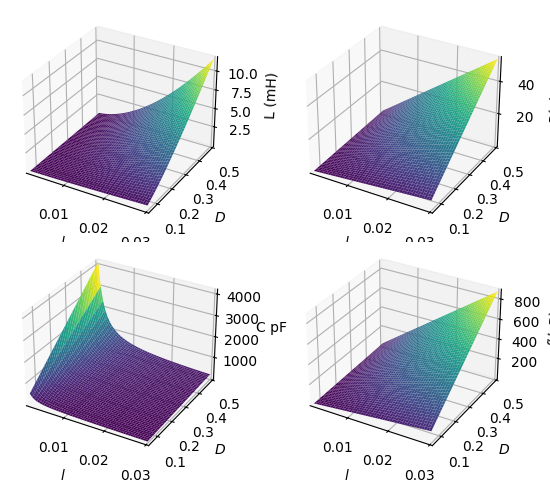

In [154]:
PlotGrid(2,2,p1,p2,p3,p4)

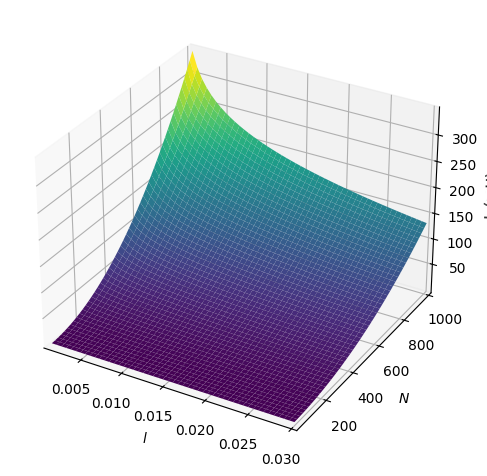

In [155]:
plot3d(L.subs([ (D,0.1)]),(l,1e-3,3e-2), (N, 10,1000), zlabel='L (mH)')

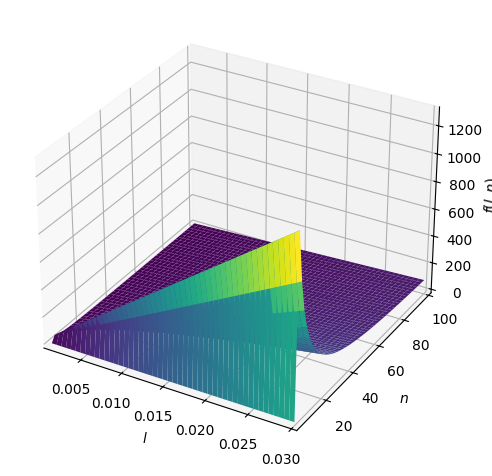

In [156]:
plot3d(Cc_discontinu.subs({d_w:0.3e-3,D:0.1,e_k:0.3e-3 - 0.25e-3,epsi_r:3.5}),(l,1e-3,3e-2),(n, 1,100))

In [157]:
x.evalf(subs={x:pi})

NameError: name 'x' is not defined

In [ ]:
C

In [ ]:
L

In [ ]:
f=(1/(2*pi*sqrt(L*(C+Cc_discontinu)*1e-15)))/1e3
f

In [ ]:
f.evalf(subs={Nsc:33,N:33,d_w:0.3e-3,n:33,e_k:0.3e-3 - 0.25e-3,d:0.25e-3,epsi_r:3.5,l:0.01,D:0.36})

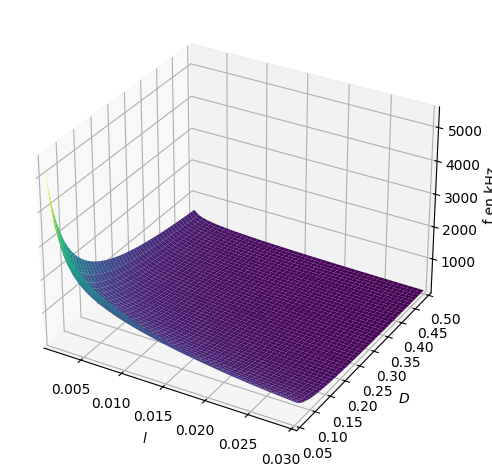

In [113]:
plot3d(f.subs({Nsc:N_det.subs([(d_w,0.3e-3)]),N:N_det.subs([(d_w,0.3e-3)]),d_w:0.3e-3,n:33,e_k:0.3e-3 - 0.25e-3,d:0.25e-3,epsi_r:3.5}),(l,1e-3,3e-2),(D, 0.05,0.5),zlabel='f en kHz')

In [114]:
1/(2*pi*sqrt(200*1e-15))

1118033.98874989/pi

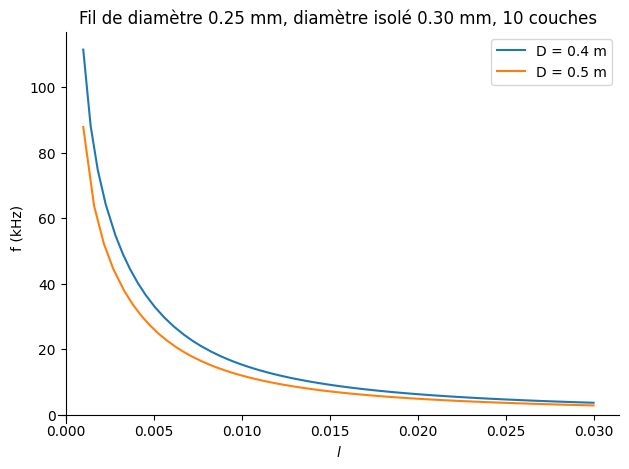

In [115]:

# Paramètres communs
d_w_val = 0.3e-3
d_val = 0.25e-3
n_val = 10
e_k_val = d_w_val - d_val
epsi_r_val = 3.5

# Valeurs spécifiques de D
D1_val = 0.4

D2_val = 0.5

# Substitutions
subs_common = {
    Nsc: N_det.subs(d_w, d_w_val),
    N: N_det.subs(d_w, d_w_val)*n_val,
    d_w: d_w_val,
    d: d_val,
    e_k: e_k_val,
    epsi_r: epsi_r_val,
    n: n_val,
}

# Tracé
g1 = plot(
    f.subs({**subs_common, D: D1_val}),
    f.subs({**subs_common, D: D2_val}),
    (l, 1e-3, 3e-2),
    ylabel='f (kHz)',
    show=False
)

# Labels dynamiques
g1[0].label = f"D = {D1_val} m"
g1[1].label = f"D = {D2_val} m"

# Titre dynamique
g1.title = f"Fil de diamètre {d_val*1e3:.2f} mm, diamètre isolé {d_w_val*1e3:.2f} mm, {n_val} couches"

# Légende
g1.legend = True

# Affichage
g1.show()

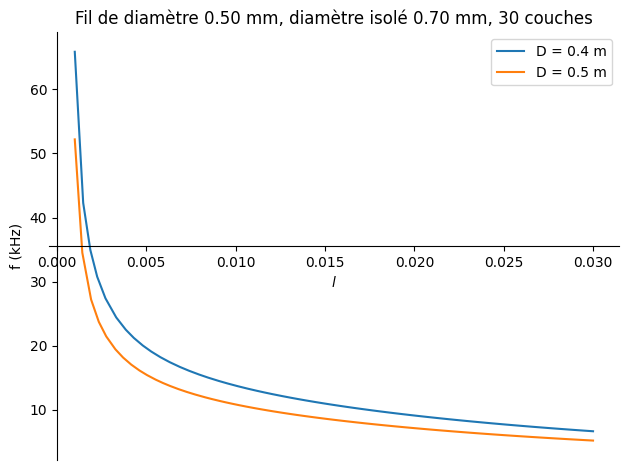

In [116]:

# Paramètres communs
d_w_val = 0.7e-3
d_val = 0.5e-3
n_val = 30
e_k_val = d_w_val - d_val
epsi_r_val = 3.5

# Valeurs spécifiques de D
D1_val = 0.4

D2_val = 0.5

# Substitutions
subs_common = {
    Nsc: N_det.subs(d_w, d_w_val),
    N: N_det.subs(d_w, d_w_val)*n_val,
    d_w: d_w_val,
    d: d_val,
    e_k: e_k_val,
    epsi_r: epsi_r_val,
    n: n_val,
}

# Tracé
g2 = plot(
    f.subs({**subs_common, D: D1_val}),
    f.subs({**subs_common, D: D2_val}),
    (l, 1e-3, 0.03),
    ylabel='f (kHz)',
    show=False
)

# Labels dynamiques
g2[0].label = f"D = {D1_val} m"
g2[1].label = f"D = {D2_val} m"

# Titre dynamique
g2.title = f"Fil de diamètre {d_val*1e3:.2f} mm, diamètre isolé {d_w_val*1e3:.2f} mm, {n_val} couches"

# Légende
g2.legend = True

# Affichage
g2.show()

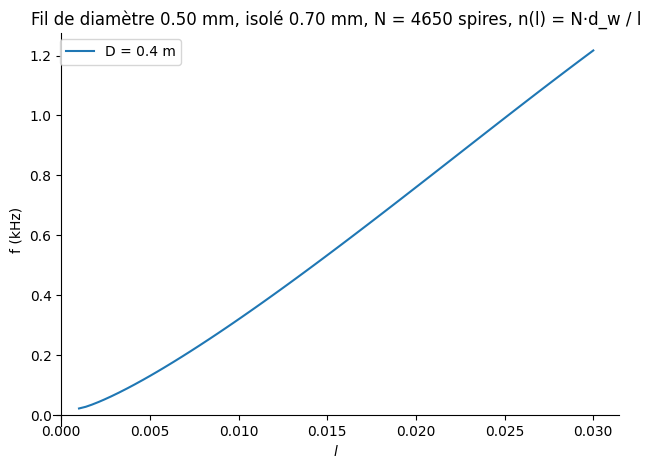

In [117]:
# Paramètres fixes
d_w_val = 0.7e-3     # diamètre fil isolé
d_val = 0.5e-3       # diamètre fil nu
e_k_val = d_w_val - d_val
epsi_r_val = 3.5
D_val = 0.4          # diamètre de la bobine

# Nombre de spires total
N_R = 5843.73 / (pi * D_val)


n_expr = N_R * d_w_val / l
Nsc_expr= N_R/n_expr

# Substitutions
subs_common = {
    Nsc: Nsc_expr,
    N: N_R,
    d_w: d_w_val,
    d: d_val,
    e_k: e_k_val,
    epsi_r: epsi_r_val,
    D: D_val,
    n: n_expr
}

# Appliquer les substitutions
f_sub = f.subs(subs_common)

# Tracé
g3 = plot(
    f_sub,
    (l, 1e-3, 3e-2),
    ylabel='f (kHz)',
    show=False
)

# Label dynamique
g3[0].label = f"D = {D_val} m"

# Titre dynamique
g3.title = (
    f"Fil de diamètre {d_val*1e3:.2f} mm, isolé {d_w_val*1e3:.2f} mm, "
    f"N = {N_R:.0f} spires, n(l) = N·d_w / l"
)

# Légende
g3.legend = True

# Affichage
g3.show()

In [118]:
R2=4*rho*N*(D+(N*(d+t)**2)/l)/d**2
R2

4*N*rho*(D + N*(d + t)**2/l)/d**2

In [158]:
1/(37e-3 *(2*pi*80e3)**2)

1.05574324324324e-9/pi**2